# AMERICAN DREAMS: REDUCING CHURN AMONG SYRIATEL'S AMERICAN CUSTOMERS

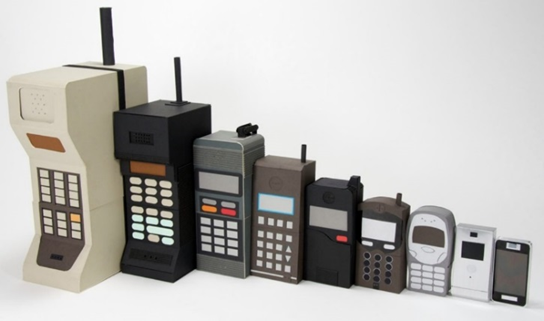

## BUSINESS UNDERSTANDING

The global telecom market is massive and is expected to grow. According to Globe News Wire, the market value of the telecom industry was $1.73 trillion in 2021. 

Furthermore, the future is promising since the market is expected to grow to $2.65 trillion by 2030. Customers use their phone not just for calling others but also for paying bills, studying, watching television, and anything else you can think of. Our phones hold the keys to our lives. Any business that provides phone service finds themselves sitting under a goldmine. If SyriaTel is looking to expand their reach in the American market or just keep its current position then it needs to undertand the business landscape and its customers.

Competition is fierce since the American market contain giants like Verizon, AT&T, and Comcast. So, if you are looking to increase your foothold in the United States or maintain your place then you have to focus on customer churn.
Today, I will provide insights and recommendations that will increase customer retention and reduce customer churn.


Source: https://www.globenewswire.com/news-release/2022/05/25/2450084/0/en/Telecom-Services-Market-Size-to-Hit-US-2-65-Trillion-by-2030.html

## DATA UNDERSTANDING

Customer churn is when a customer leaves the company and retention is when a customer continues using the company’s service. SyriaTel’s churn rate is only 14.5% compared to the industry average of 22%. I used a dataset of over 3,000 American customers. I wanted to know what factors are most important in determining customer churn and how churn can be reduced. **The metric I will optimize is the F1 score**. Both precision and recall are very important for this project so F1 is best used because it is a combination of both precision and recall.  


Source: https://www.smartlook.com/blog/customer-churn-retention/

## DATA PREPARATION AND CLEANING

Let's start by importing the relevant libraries and packages. Yes, there are alot of them:

In [47]:
import pandas as pd 
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, f1_score
df = pd. read_excel ('bigml_59c28831336c6604c800002a.xlsx')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Check the columns:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Checking for null values:

In [6]:
df.isnull().values.any()

False

How many customers churn in this dataset? True denotes a churned customer.

In [7]:

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

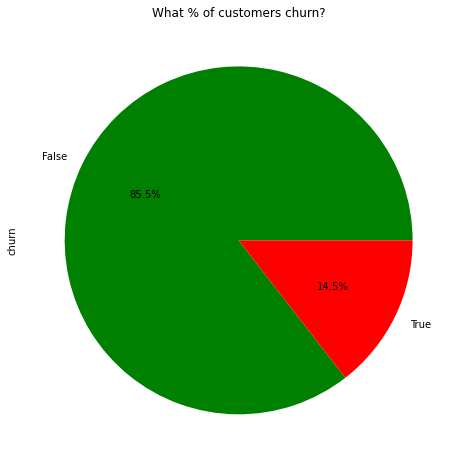

In [8]:
fig,ax= plt.subplots(figsize=(12, 8))
ax.set_title("What % of customers churn?");
df['churn'].value_counts().plot.pie( colors=['green', 'red'],autopct ='%.1f%%');

Any duplicates:

In [9]:
df.duplicated().sum()

0

Checking the distributions:

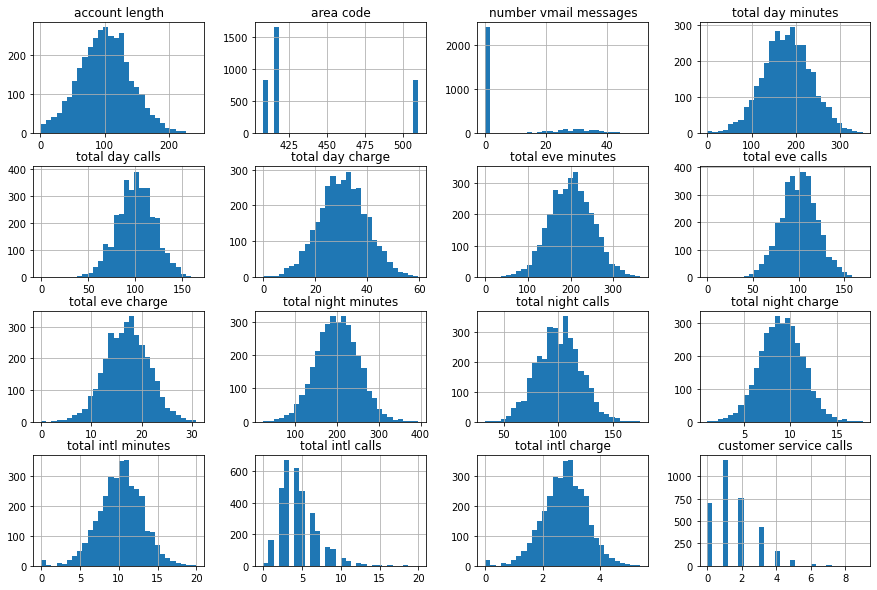

In [10]:
df.hist(bins=30, figsize=(15, 10));

Mercifully, most of the numerical categories are fairly normally distributed. Now let's check the correlations for multicollinearity.

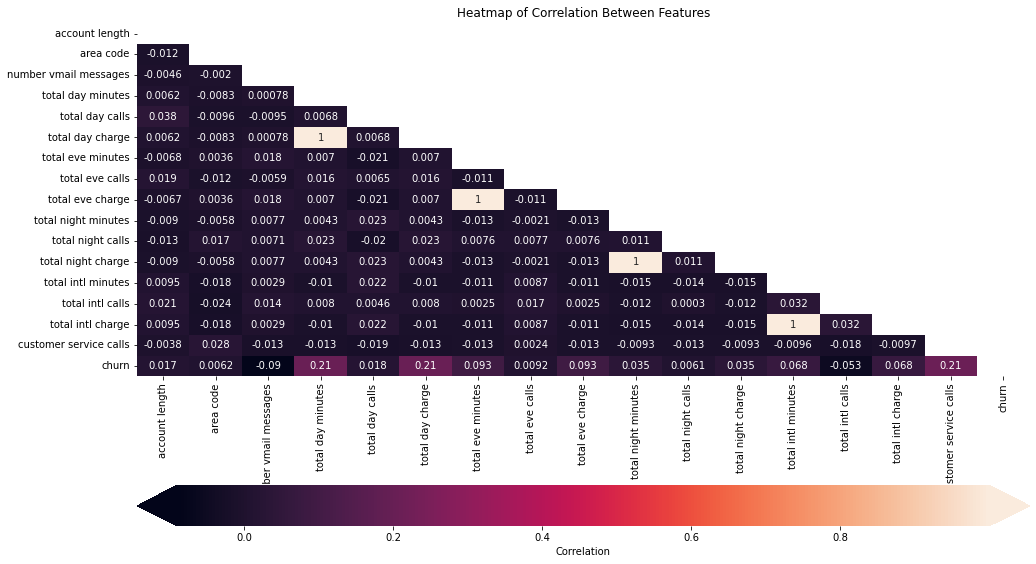

In [11]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(
    data=df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

Let's get some value counts:

In [12]:
print(len(df['state'].unique()), 'states')
print(df['area code'].value_counts())
print(df['international plan'].value_counts())
print(df['voice mail plan'].value_counts())


51 states
415    1655
510     840
408     838
Name: area code, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64


In [13]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

### OneHot Encoding

Let's keep every categoties when we OneHot Encode.

In [14]:
## have to ohe account length, area code, international plan, voice mail plan
## eliminate phone number
df_ohe = df
categorical_columns = ['state','international plan', 'area code', 'voice mail plan']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [15]:
df_ohe

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,area code_408,area code_415,area code_510,voice mail plan_no,voice mail plan_yes
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,1,0,0,1,0,0,1
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,1,0,0,1,0,0,1
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,1,0,0,1,0,1,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,1,1,0,0,1,0
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,414-4276,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,1,0,0,1,0,0,1
3329,68,370-3271,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,1,0,1,0,0,1,0,1,0
3330,28,328-8230,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,1,0,0,0,1,1,0
3331,184,364-6381,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0,0,0,0,1,0,0,1,1,0


In [16]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   phone number            3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

I am going to drop the phone number column and the charge columns. Phone numbers should be dropped because they are meaningless as numbers and too numerous as categoricals to use. The charge columns have high correlations to other columns so should be dropped.

In [17]:
#Dropping phone number. Also dropping the charge columns because of multicollinearity concerns. 
df_ohe.drop(["phone number","total day charge", "total eve charge", "total night charge", "total intl charge"], axis=1,inplace=True)


##  MODELING AND PREDICTION

The 1st split is the test-train split.

In [18]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe.drop('churn',axis=1), df_ohe['churn'], random_state=42)

In [19]:
X_test

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,area code_408,area code_415,area code_510,voice mail plan_no,voice mail plan_yes
438,113,0,155.0,93,330.6,106,189.4,123,13.5,3,...,0,0,1,1,0,0,0,1,1,0
2674,67,0,109.1,117,217.4,124,188.4,141,12.8,6,...,0,0,0,1,0,0,1,0,1,0
1345,98,0,0.0,0,159.6,130,167.1,88,6.8,1,...,0,0,0,1,0,0,1,0,1,0
1957,147,0,212.8,79,204.1,91,156.2,113,10.2,2,...,0,0,0,1,0,1,0,0,1,0
2148,96,0,144.0,102,224.7,73,227.7,91,10.0,7,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,171,0,137.5,110,198.1,109,292.7,131,13.3,5,...,0,0,0,1,0,0,1,0,1,0
1586,89,0,82.3,77,167.2,80,194.7,70,7.2,4,...,0,0,0,1,0,0,1,0,1,0
3068,78,21,160.6,85,223.1,79,124.0,92,9.5,1,...,0,0,0,1,0,0,1,0,0,1
2484,141,39,116.9,127,276.5,88,289.9,125,12.3,2,...,0,0,0,1,0,0,1,0,0,1


Now, let's start with **logistic regression**:

In [20]:
lr = LogisticRegression(max_iter=4000,random_state=42)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [21]:
scores = cross_val_score(estimator=lr, X=X_train,
                        y=y_train, cv=5)
scores

C:\Users\isaia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.864     , 0.878     , 0.86      , 0.848     , 0.86172345])

In [22]:
#Checking prediction scores for retained customers.
preds_lr = lr.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr))
print("precision:", precision_score(y_test, preds_lr, pos_label=False))
print("recall:", recall_score(y_test, preds_lr, pos_label=False))
print("f1_score:", f1_score(y_test, preds_lr, pos_label=False))

accuracy:  0.8573141486810552
precision: 0.8734177215189873
recall: 0.9732016925246827
f1_score: 0.9206137424949967


In [23]:
#Checking churned scores for retained customers.

preds_lr_tr = lr.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr_tr))
print("precision:", precision_score(y_test, preds_lr_tr, pos_label=True))
print("recall:", recall_score(y_test, preds_lr_tr, pos_label=True))
print("f1_score:", f1_score(y_test, preds_lr_tr, pos_label=True))

accuracy:  0.8573141486810552
precision: 0.5681818181818182
recall: 0.2
f1_score: 0.29585798816568043


Maybe a **scaled logistic regression** would work better. Let's see:

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_train_0 = scaler.fit_transform(X_train)
scaled_data_test_0 = scaler.transform(X_test)

In [31]:
lr_scaled = LogisticRegression(max_iter=4000, random_state=42)

lr_scaled.fit(scaled_data_train_0, y_train)

LogisticRegression(max_iter=4000)

In [32]:
preds_lr_scale_false = lr_scaled.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr_scale_false))
print("precision:", precision_score(y_test, preds_lr_scale_false, pos_label=False))
print("recall:", recall_score(y_test, preds_lr_scale_false, pos_label=False))
print("f1_score:", f1_score(y_test, preds_lr_scale_false, pos_label=False))

accuracy:  0.1498800959232614
precision: 0.0
recall: 0.0
f1_score: 0.0


C:\Users\isaia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
preds_lr_scale_true = lr_scaled.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr_scale_true))
print("precision:", precision_score(y_test, preds_lr_scale_true, pos_label=True))
print("recall:", recall_score(y_test, preds_lr_scale_true, pos_label=True))
print("f1_score:", f1_score(y_test, preds_lr_scale_true, pos_label=True))

accuracy:  0.1498800959232614
precision: 0.1498800959232614
recall: 1.0
f1_score: 0.26068821689259647


That didn't work well. The model was unable to find any retained customers and the churned customer predictions were poor either. The problem here may derive from the class imbalance. Let's see if a **decision tree** does any better:

In [22]:
rt = DecisionTreeClassifier(random_state=42)

rt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
scores = cross_val_score(estimator=rt, X=X_train,
               y=y_train, cv=5)
scores

array([0.906     , 0.898     , 0.914     , 0.922     , 0.92985972])

In [24]:
preds = rt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=False))
print("recall:", recall_score(y_test, preds, pos_label=False))
print("f1_score:", f1_score(y_test, preds, pos_label=False))

accuracy:  0.9136690647482014
precision: 0.9543509272467903
recall: 0.9435825105782792
f1_score: 0.9489361702127659


In [25]:
preds = rt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=True))
print("recall:", recall_score(y_test, preds, pos_label=True))
print("f1_score:", f1_score(y_test, preds, pos_label=True))

accuracy:  0.9136690647482014
precision: 0.6992481203007519
recall: 0.744
f1_score: 0.7209302325581395


Those results are the best so far! Now let's examine a **KNN** model next:

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(random_state=42)
knn.fit(scaled_data_train, y_train)


KNeighborsClassifier()

In [62]:
preds = knn.predict(scaled_data_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=False))
print("recall:", recall_score(y_test, preds, pos_label=False))
print("f1_score:", f1_score(y_test, preds, pos_label=False))

accuracy:  0.8441247002398081
precision: 0.8552147239263803
recall: 0.9830747531734838
f1_score: 0.9146981627296588


In [65]:
preds = knn.predict(scaled_data_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=True))
print("recall:", recall_score(y_test, preds, pos_label=True))
print("f1_score:", f1_score(y_test, preds, pos_label=True))

accuracy:  0.8441247002398081
precision: 0.3684210526315789
recall: 0.056
f1_score: 0.09722222222222222


Yikes, uninspiring results to say the least. Maybe a **Random Forest** will do better:

In [30]:
rfr = RandomForestClassifier(random_state=42)
rfr.fit(X_train, y_train)



RandomForestClassifier()

In [31]:
preds = rfr.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=False))
print("recall:", recall_score(y_test, preds, pos_label=False))
print("f1_score:", f1_score(y_test, preds, pos_label=False))

accuracy:  0.9280575539568345
precision: 0.9230769230769231
recall: 0.998589562764457
f1_score: 0.959349593495935


In [32]:
preds = rfr.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, pos_label=True))
print("recall:", recall_score(y_test, preds, pos_label=True))
print("f1_score:", f1_score(y_test, preds, pos_label=True))

accuracy:  0.9280575539568345
precision: 0.9850746268656716
recall: 0.528
f1_score: 0.6875


### ADRESSING CLASS IMBALANCE

This is better but not much better. One problem inherent in the dataset is the class imbalance. Only 14.5% of the customers actually churn. The Random Forest was excellent at predicting retained customers but struggled with churned customers and that may be because of the class imbalance. Therefore, it may be helpful to try a method which addresses the class imbalance. Let's try **SMOTE**:

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
y_train_resampled.value_counts()

False    2141
True     2141
Name: churn, dtype: int64

Above is the new value count since SMOTE equalized the dataset. Let's start with the **Decision Tree**:

In [40]:
rt_smote=DecisionTreeClassifier(random_state=42)
rt_smote.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [41]:
preds_rt_smote = rt_smote.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rt_smote))
print("precision:", precision_score(y_test, preds_rt_smote, pos_label=False))
print("recall:", recall_score(y_test, preds_rt_smote, pos_label=False))
print("f1_score:", f1_score(y_test, preds_rt_smote, pos_label=False))

accuracy:  0.9040767386091128
precision: 0.9577874818049491
recall: 0.9280677009873061
f1_score: 0.9426934097421203


In [42]:
preds_rt_smote_ch = rt_smote.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rt_smote_ch))
print("precision:", precision_score(y_test, preds_rt_smote_ch, pos_label=True))
print("recall:", recall_score(y_test, preds_rt_smote_ch, pos_label=True))
print("f1_score:", f1_score(y_test, preds_rt_smote_ch, pos_label=True))

accuracy:  0.9040767386091128
precision: 0.6530612244897959
recall: 0.768
f1_score: 0.7058823529411764


Very good although there have been previous models that worked better. Maybe a **Random Forest** will work?

In [43]:
rando_for_smote=RandomForestClassifier(random_state=42)
rando_for_smote=rando_for_smote.fit(X_train_resampled, y_train_resampled)


In [44]:
rf_scores_re = cross_val_score(estimator=rando_for_smote, X=X_train,
               y=y_train, cv=5)
rf_scores_re

array([0.932     , 0.934     , 0.934     , 0.916     , 0.93386774])

In [45]:
preds_rfr_smote = rando_for_smote.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rfr_smote))
print("precision:", precision_score(y_test, preds_rfr_smote, pos_label=False))
print("recall:", recall_score(y_test, preds_rfr_smote, pos_label=False))
print("f1_score:", f1_score(y_test, preds_rfr_smote, pos_label=False))

accuracy:  0.9268585131894485
precision: 0.9426229508196722
recall: 0.9732016925246827
f1_score: 0.9576682859125607


In [46]:
preds_rfr_smote = rando_for_smote.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rfr_smote))
print("precision:", precision_score(y_test, preds_rfr_smote, pos_label=True))
print("recall:", recall_score(y_test, preds_rfr_smote, pos_label=True))
print("f1_score:", f1_score(y_test, preds_rfr_smote, pos_label=True))

accuracy:  0.9268585131894485
precision: 0.8137254901960784
recall: 0.664
f1_score: 0.7312775330396476


Look good but maybe another model can do better. 

In [52]:
lr_smote_0 = LogisticRegression(max_iter=4000)

lr_smote_0.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=4000)

In [53]:
preds_lr_smote = lr_smote_0.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr_smote))
print("precision:", precision_score(y_test, preds_lr_smote, pos_label=False))
print("recall:", recall_score(y_test, preds_lr_smote, pos_label=False))
print("f1_score:", f1_score(y_test, preds_lr_smote, pos_label=False))

accuracy:  0.8669064748201439
precision: 0.8903394255874674
recall: 0.9619181946403385
f1_score: 0.9247457627118644


In [54]:
preds_lr_smote_true = lr_smote_0.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_lr_smote_true))
print("precision:", precision_score(y_test, preds_lr_smote_true, pos_label=True))
print("recall:", recall_score(y_test, preds_lr_smote_true, pos_label=True))
print("f1_score:", f1_score(y_test, preds_lr_smote_true, pos_label=True))

accuracy:  0.8669064748201439
precision: 0.6029411764705882
recall: 0.328
f1_score: 0.42487046632124353


Somehow, that was worse. Maybe **logistic regression** will do better?

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_train_1 = scaler.fit_transform(X_train_resampled)
scaled_data_test_1 = scaler.transform(X_test)

In [57]:
lr_smote_1 = LogisticRegression(max_iter=4000, random_state=42)

lr_smote_1.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=4000)

In [59]:
preds_lr_smote1 = lr_smote_0.predict(scaled_data_test_1)

print("accuracy: ", accuracy_score(y_test, preds_lr_smote1))
print("precision:", precision_score(y_test, preds_lr_smote1, pos_label=False))
print("recall:", recall_score(y_test, preds_lr_smote1, pos_label=False))
print("f1_score:", f1_score(y_test, preds_lr_smote1, pos_label=False))

accuracy:  0.8405275779376499
precision: 0.854679802955665
recall: 0.9788434414668548
f1_score: 0.9125575279421433


In [58]:
preds_lr_smote1_true = lr_smote_0.predict(scaled_data_test_1)

print("accuracy: ", accuracy_score(y_test, preds_lr_smote1_true))
print("precision:", precision_score(y_test, preds_lr_smote1_true, pos_label=True))
print("recall:", recall_score(y_test, preds_lr_smote1_true, pos_label=True))
print("f1_score:", f1_score(y_test, preds_lr_smote1_true, pos_label=True))

accuracy:  0.8405275779376499
precision: 0.3181818181818182
recall: 0.056
f1_score: 0.09523809523809525


Also, not good, at all. Let's try KNN.

In [72]:
scaled_data_train_knn = scaler.fit_transform(X_train)
scaled_data_test_knn = scaler.transform(X_test)

In [78]:
knn_smote = KNeighborsClassifier(random_state=42)

knn_smote.fit(scaled_data_train_knn, y_train)



KNeighborsClassifier()

In [81]:
preds_knn_sm = knn_smote.predict(scaled_data_test_knn)

print("accuracy: ", accuracy_score(y_test, preds_knn_sm))
print("precision:", precision_score(y_test, preds_knn_sm, pos_label=False))
print("recall:", recall_score(y_test, preds_knn_sm, pos_label=False))
print("f1_score:", f1_score(y_test, preds_knn_sm, pos_label=False))

accuracy:  0.8441247002398081
precision: 0.8552147239263803
recall: 0.9830747531734838
f1_score: 0.9146981627296588


In [82]:
preds_knn_sm_tr = knn_smote.predict(scaled_data_test_knn)

print("accuracy: ", accuracy_score(y_test, preds_knn_sm_tr))
print("precision:", precision_score(y_test, preds_knn_sm_tr, pos_label=True))
print("recall:", recall_score(y_test, preds_knn_sm_tr, pos_label=True))
print("f1_score:", f1_score(y_test, preds_knn_sm_tr, pos_label=True))

accuracy:  0.8441247002398081
precision: 0.3684210526315789
recall: 0.056
f1_score: 0.09722222222222222


That didn't work at well either. 

### GRID SEARCH AND PIPELINES

Now, I will use grid searches inside of pipelines to find the optimal value for a few different model types. Let's start with the **Decision Tree**:

In [84]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('rt', DecisionTreeClassifier(random_state=42))
])

parameters_1 = {
    "rt__criterion" :["gini", "entropy"],
    "rt__max_depth" : [2,4,6,8]
    
}

cv = GridSearchCV(pipeline, param_grid=parameters_1, scoring= 'f1')

cv.fit(X_train, y_train)
cv.best_params_

{'rt__criterion': 'gini', 'rt__max_depth': 6}

In [85]:
rt_opt = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=42)

rt_opt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [86]:
preds_rt_opt = rt_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rt_opt))
print("precision:", precision_score(y_test, preds_rt_opt, pos_label=False))
print("recall:", recall_score(y_test, preds_rt_opt, pos_label=False))
print("f1_score:", f1_score(y_test, preds_rt_opt, pos_label=False))

accuracy:  0.9496402877697842
precision: 0.9549795361527967
recall: 0.9873060648801129
f1_score: 0.9708737864077669


In [87]:
preds_rt_opt = rt_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rt_opt))
print("precision:", precision_score(y_test, preds_rt_opt, pos_label=True))
print("recall:", recall_score(y_test, preds_rt_opt, pos_label=True))
print("f1_score:", f1_score(y_test, preds_rt_opt, pos_label=True))

accuracy:  0.9496402877697842
precision: 0.9108910891089109
recall: 0.736
f1_score: 0.8141592920353982


Wow, that result is much better. Up next is the **Random Forest Classifier**:

In [95]:
pipeline_dos = Pipeline([
    ('rfr_pip', RandomForestClassifier(random_state=42))
])

parameters_dos = {
    "rfr_pip__n_estimators" :[50, 100,150],
    "rfr_pip__criterion" : ["gini", "entropy"],
    "rfr_pip__max_depth": [2, 5, 8]
    
}

cv_dos = GridSearchCV(pipeline_dos, param_grid=parameters_dos, scoring= 'f1')

cv_dos.fit(X_train, y_train)
cv_dos.best_params_

{'rfr_pip__criterion': 'entropy',
 'rfr_pip__max_depth': 8,
 'rfr_pip__n_estimators': 100}

In [96]:
rfr_opt = RandomForestClassifier(criterion='gini',max_depth=8, n_estimators=100, random_state=42)

rfr_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [97]:
preds_rfr_opt = rfr_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rfr_opt))
print("precision:", precision_score(y_test, preds_rfr_opt, pos_label=False))
print("recall:", recall_score(y_test, preds_rfr_opt, pos_label=False))
print("f1_score:", f1_score(y_test, preds_rfr_opt, pos_label=False))

accuracy:  0.8932853717026379
precision: 0.8884711779448622
recall: 1.0
f1_score: 0.9409422694094227


In [98]:
preds_rfr_opt = rfr_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, preds_rfr_opt))
print("precision:", precision_score(y_test, preds_rfr_opt, pos_label=True))
print("recall:", recall_score(y_test, preds_rfr_opt, pos_label=True))
print("f1_score:", f1_score(y_test, preds_rfr_opt, pos_label=True))

accuracy:  0.8932853717026379
precision: 1.0
recall: 0.288
f1_score: 0.44720496894409933


Wow, that result was disappointing. However, maybe there's something  better. Let's try **XGBoost**:

In [102]:
# should make sure warnings are set to ignore.
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
pipeline_tres = Pipeline([
    ('xgb_opt', XGBClassifier(random_state=42))
])

parameters_tres = {
    'xgb_opt__learning_rate': [0.1, 0.2],
    'xgb_opt__max_depth': [3,5],
    'xgb_opt__min_child_weight': [1, 2],
    'xgb_opt__subsample': [0.5, 0.7],
}

# must specify eval_metric else it will assume 'logloss'
cv_tres = GridSearchCV(pipeline_tres, param_grid=parameters_tres, scoring= 'f1')

cv_tres.fit(X_train, y_train, xgb_opt__eval_metric='error')
cv_tres.best_params_

{'xgb_opt__learning_rate': 0.1,
 'xgb_opt__max_depth': 5,
 'xgb_opt__min_child_weight': 1,
 'xgb_opt__subsample': 0.7}

In [103]:
xgb_opt = XGBClassifier(learning_rate= 0.1, max_depth= 5, min_child_weight= 1, subsample= 0.7,random_state=42)

In [104]:
xgb_opt.fit(X_train, y_train, eval_metric='error')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
xgb_opt_pr = xgb_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, xgb_opt_pr))
print("precision:", precision_score(y_test, xgb_opt_pr, pos_label=False))
print("recall:", recall_score(y_test, xgb_opt_pr, pos_label=False))
print("f1_score:", f1_score(y_test, xgb_opt_pr, pos_label=False))

accuracy:  0.9532374100719424
precision: 0.9551630434782609
recall: 0.9915373765867419
f1_score: 0.9730103806228374


In [106]:
xgb_opt_pr = xgb_opt.predict(X_test)

print("accuracy: ", accuracy_score(y_test, xgb_opt_pr))
print("precision:", precision_score(y_test, xgb_opt_pr, pos_label=True))
print("recall:", recall_score(y_test, xgb_opt_pr, pos_label=True))
print("f1_score:", f1_score(y_test, xgb_opt_pr, pos_label=True))

accuracy:  0.9532374100719424
precision: 0.9387755102040817
recall: 0.736
f1_score: 0.8251121076233184


Great! That's our best model so far so it's the one that we will use.  Now let's do some analysis.

## EVALUATION 

### Feature Importance

Let's examine feature importance and take out the 5 most important features:

In [107]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
model_log = xgb_opt.fit(X_train, y_train, eval_metric="error")
y_hat_test = xgb_opt.predict(X_test)

Training AUC: 0.9326713681241185


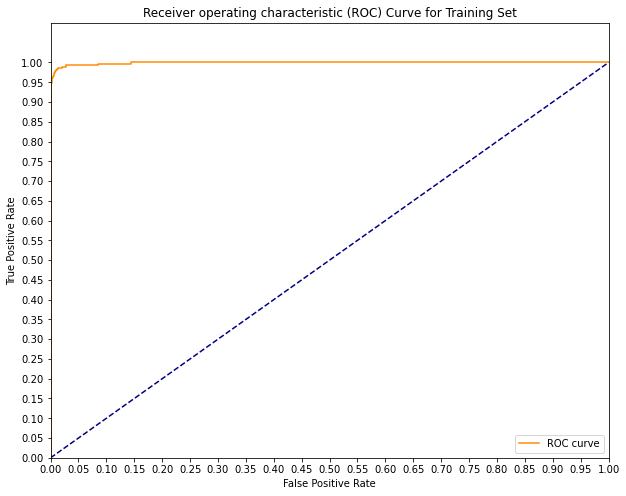

In [108]:
y_train_score = model_log.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
y_test_score = model_log.predict_proba(X_test)[:, 1]
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.show()

Here's a horizontal bar graph of each feature:

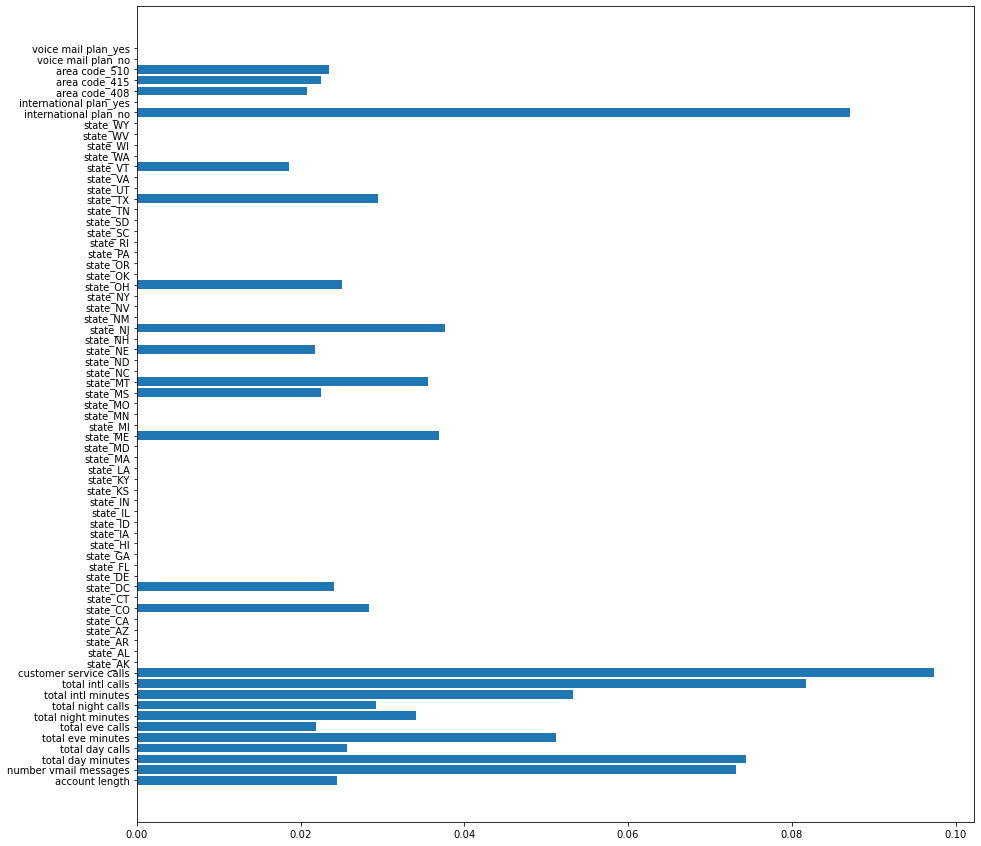

In [110]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
fig, ax = plt.subplots(figsize=(15, 15))
plt.barh(X_test.columns, xgb_opt.feature_importances_);

Now, let's show the exact feature importance for each feature:

In [74]:
from matplotlib import pyplot
xgb_opt.fit(X_train, y_train, eval_metric="error")
importance = xgb_opt.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.02787
Feature: 1, Score: 0.08909
Feature: 2, Score: 0.08387
Feature: 3, Score: 0.02796
Feature: 4, Score: 0.06156
Feature: 5, Score: 0.02604
Feature: 6, Score: 0.03644
Feature: 7, Score: 0.02991
Feature: 8, Score: 0.06307
Feature: 9, Score: 0.09911
Feature: 10, Score: 0.13098
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.02739
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

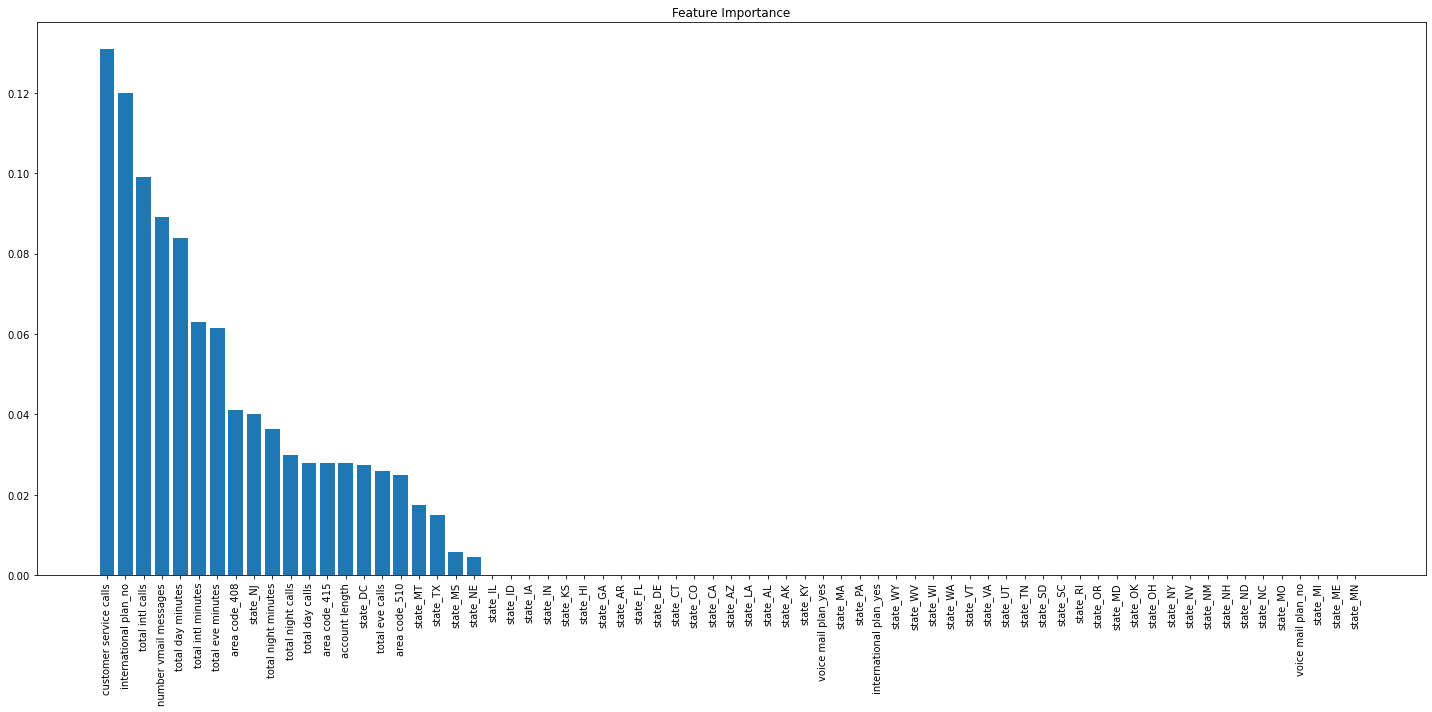

In [75]:
sorted_indices = np.argsort(importance)[::-1]
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Now let's graph those features:

In [113]:
# Dictionary that will be used for graph
top_5={'Customer Service Calls':(0.131*100), 'Domestic Plan Only': (0.12*100), 'Total International Calls':(0.099*100),
      "Number of Voicemail Messages":(0.089*100), "Total Day Minutes":(0.084*100)}
top_5

{'Customer Service Calls': 13.100000000000001,
 'Domestic Plan Only': 12.0,
 'Total International Calls': 9.9,
 'Number of Voicemail Messages': 8.9,
 'Total Day Minutes': 8.4}

In [115]:
# DataFrame
from operator import itemgetter, attrgetter
Graph_1=sorted(top_5.items(), key=itemgetter(1))
top5_features= pd.DataFrame(Graph_1)
top5_features.rename( columns={0 :'Feature', 1:'Importance %'}, inplace=True )
top5_features

,Feature,Importance %
0,Total Day Minutes,8.4
1,Number of Voicemail Messages,8.9
2,Total International Calls,9.9
3,Domestic Plan Only,12.0
4,Customer Service Calls,13.1


Here's the feature importance graph:

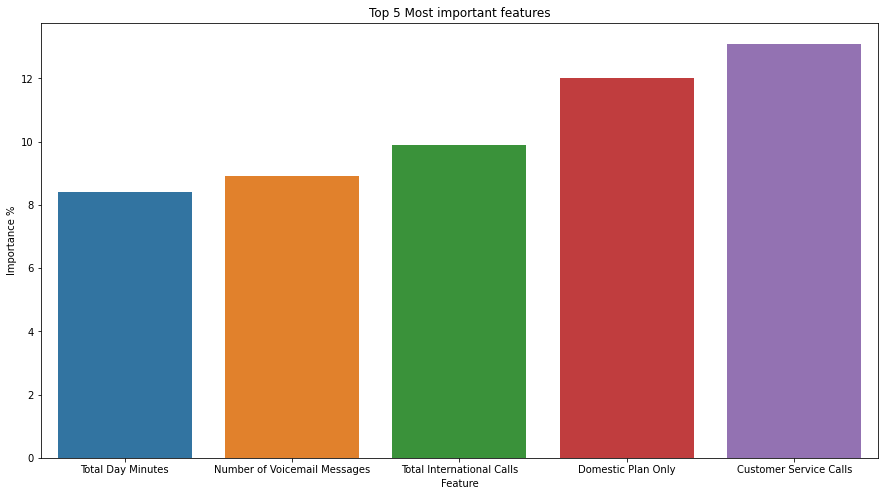

In [116]:

plt.figure(figsize = (15,8))
ax=sns.barplot(x='Feature', y='Importance %', data=top5_features)
ax.set_title("Top 5 Most important features");

The next step is to analyze the data behind these features:

In [117]:
# Making 2 DataFrames with churned and retained customers, respectively.
not_retained_customers=df_ohe.loc[df_ohe.churn== True]
retained_customers=df_ohe.loc[df_ohe.churn== False]
retained_customers

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,area code_408,area code_415,area code_510,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,1,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,1,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,1,0,0,1,0,1,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,1,1,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,215.5,126,279.1,83,9.9,6,...,0,0,0,1,0,0,1,0,0,1
3329,68,0,231.1,57,153.4,55,191.3,123,9.6,4,...,0,1,0,1,0,0,1,0,1,0
3330,28,0,180.8,109,288.8,58,191.9,91,14.1,6,...,0,0,0,1,0,0,0,1,1,0
3331,184,0,213.8,105,159.6,84,139.2,137,5.0,10,...,0,0,0,0,1,0,0,1,1,0


### Customer Service Calls

Let's start by examining customer service calls since that is the most impacftful feature.

In [118]:
print(not_retained_customers["customer service calls"].mean())
print(retained_customers["customer service calls"].mean())
#customers who leave call customer service more

2.229813664596273
1.4498245614035088


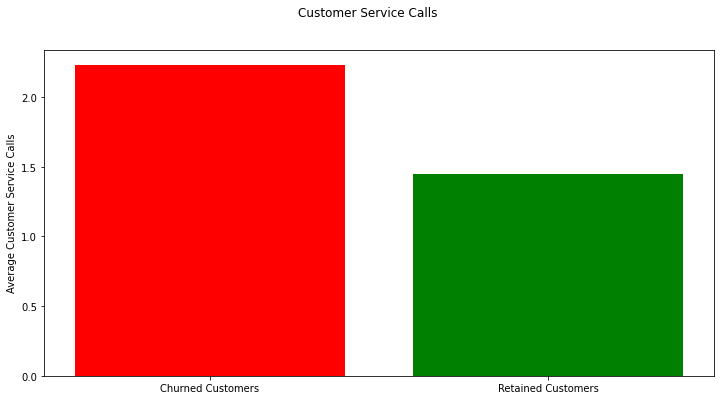

In [119]:
n=np.array([not_retained_customers["customer service calls"].mean(), retained_customers["customer service calls"].mean()])
Customer_Service_Calls = ["Churned Customers", "Retained Customers"]
fig_2, ax_2 = plt.subplots(ncols=1, figsize=(12,6))
plt.bar(Customer_Service_Calls, n, color=['red','green'])
ax_2.set_ylabel("Average Customer Service Calls")
plt.suptitle('Customer Service Calls')

plt.show();

Churned customers actually call customer service more than retained customers.

**Recommendation# 1: Proactively reach out to customers who make 2.29 calls or more. Or you can simply reach out to customers who have made 2 or more customer service calls**.

### Plan Type

In [85]:
print(not_retained_customers["international plan_no"].value_counts())
print(retained_customers["international plan_no"].value_counts())

1    346
0    137
Name: international plan_no, dtype: int64
1    2664
0     186
Name: international plan_no, dtype: int64


In [86]:
print(not_retained_customers["international plan_no"].sum()/not_retained_customers["international plan_no"].count(), '% of those who churn do not have international plans and therefore only have domestic plans. And 29% also have international plans')
print(retained_customers["international plan_no"].sum()/retained_customers["international plan_no"].count(), '% of those who are retained do not have international plans and therefore only have domestic plans. And 6% also have international plans')# most who are not retained do not have an international plan, 

0.7163561076604554 % of those who are not retained do not have international plans and therefore only have domestic plans. And 29% also have international plans
0.9347368421052632 % of those who are retained do not have international plans and therefore only have domestic plans. And 6% also have international plans


In [123]:
leak_custo_calls=not_retained_customers.groupby("international plan_no")["customer service calls"].mean()
leak_custo_calls


international plan_no
0    1.605839
1    2.476879
Name: customer service calls, dtype: float64

In [122]:
Plan_types = ["International Plan", "Domestic Only"]


In [126]:
array_leak_custo_calls=leak_custo_calls.to_numpy()

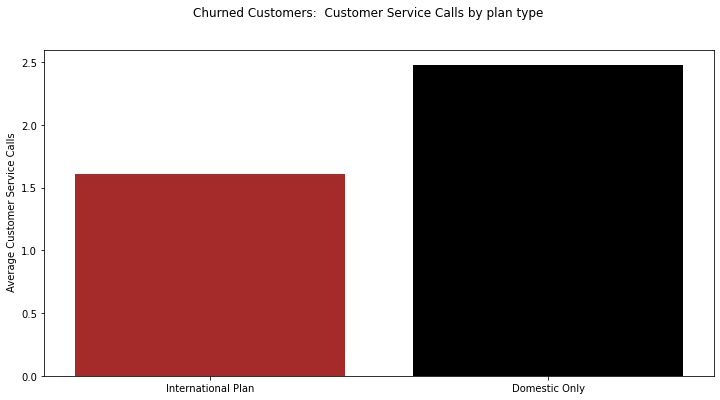

In [127]:
fig_0, ax_0 = plt.subplots(ncols=1, figsize=(12,6))
plt.bar(Plan_types, array_leak_custo_calls, color=['brown','black'])
ax_0.set_ylabel(" Average Customer Service Calls")
plt.suptitle('Churned Customers:  Customer Service Calls by plan type');

**Recommendation #2: Make a concerted effort to document and satisfy the concerns of customers who only have domestic plans since they represent the vast majority of churning customers. Target customer service calls for identifying concerns.**


### Minutes

In [130]:
print(not_retained_customers["total day minutes"].mean())
print(retained_customers["total day minutes"].mean())
# customers who are not retained actually use more day minutes than retained customers

206.91407867494814
175.17575438596492


In [131]:
print(not_retained_customers["total eve minutes"].mean())
print(retained_customers["total eve minutes"].mean())
# customers who are not retained actually use more evening minutes than retained customers

212.41014492753618
199.04329824561412


In [132]:
not_retained_mins=[not_retained_customers["total day minutes"].mean(), not_retained_customers["total eve minutes"].mean()]
retained_minutes= [retained_customers["total day minutes"].mean(), retained_customers["total eve minutes"].mean()]

In [133]:
churned_min=(not_retained_customers["total day minutes"].mean()+not_retained_customers["total eve minutes"].mean() +not_retained_customers["total night minutes"].mean())
ret_min=(retained_customers["total day minutes"].mean()+retained_customers["total eve minutes"].mean() +retained_customers["total night minutes"].mean())
print('Churned customers spend', (churned_min-ret_min), 'more minutes on the phone')

Churned customers spend 50.20365500708181 more minutes on the phone


In [134]:
not_retained_customers['sum'] = not_retained_customers['total day minutes'] + not_retained_customers['total eve minutes']+not_retained_customers["total night minutes"].mean()
retained_customers['sum']=retained_customers["total day minutes"] + retained_customers['total eve minutes']+retained_customers["total night minutes"].mean()

In [135]:
df['total day minutes'].mean() + df['total eve minutes'].mean()+df["total night minutes"].mean()


581.627482748275

In [148]:
retained_customers['sum'].quantile(.8)

632.3531929824569

In [137]:
retained_customers['sum'].mean()

574.3522456140427

In [139]:
retained_customers['sum'].describe()

count    2850.000000
mean      574.352246
std        68.427609
min       325.633193
25%       530.858193
50%       576.433193
75%       622.908193
max       802.033193
Name: sum, dtype: float64

In [143]:
not_retained_customers['sum'].describe()

count    483.000000
mean     624.555901
std       95.587157
min      343.931677
25%      547.581677
50%      634.631677
75%      706.981677
max      855.931677
Name: sum, dtype: float64

In [141]:
minutes={'Churned Customers':not_retained_customers['sum'].mean(), 'Retained Customers':retained_customers['sum'].mean()}
minutes

{'Churned Customers': 624.5559006211181,
 'Retained Customers': 574.3522456140427}

In [145]:
Graph_2=sorted(minutes.items(), key=itemgetter(1))
Min_dif= pd.DataFrame(Graph_2)
Min_dif.rename( columns={0 :'Customer Status', 1:'Minutes Used'}, inplace=True )
Min_dif

,Customer Status,Minutes Used
0,Retained Customers,574.352246
1,Churned Customers,624.555901


In [146]:
churned_min#-ret_min)#/(churned_min)

419.3242236024843

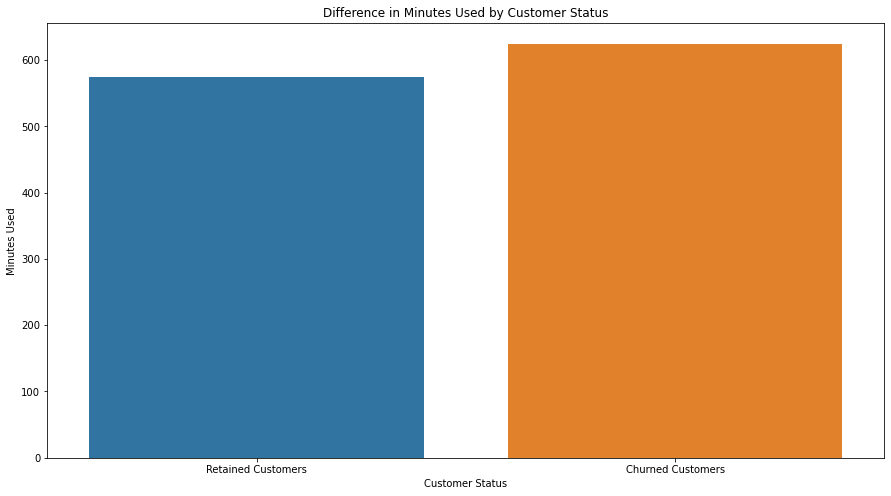

In [147]:
plt.figure(figsize = (15,8))
ax=sns.barplot(x='Customer Status', y='Minutes Used', data=Min_dif)
ax.set_title("Difference in Minutes Used by Customer Status");

**Recommendation #3: Reward customers who use  634 or over monthly minutes. This will target 50% of churned customers and about 20% of retained customers**.


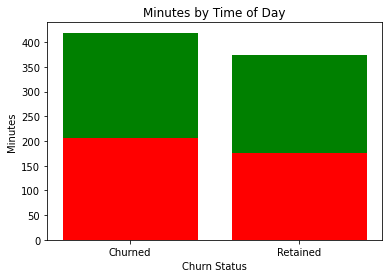

In [155]:
y1 = [not_retained_customers["total day minutes"].mean(), retained_customers["total day minutes"].mean()]
y2 = [not_retained_customers["total eve minutes"].mean(), retained_customers["total eve minutes"].mean()]
x = ['Churned', 'Retained']

fig, ax = plt.subplots()
times= ['Day', 'Evening']
ax.set_title('Minutes by Time of Day')
ax.set_ylabel('Minutes')
ax.set_xlabel('Churn Status')
ax.bar(x, y1,  label='e')
ax.bar(x, y2, label="?")

plt.bar(x, y1, color='red')
plt.bar(x, y2, bottom=y1, color='green')
plt.show()

### Area Code

In [106]:
print(not_retained_customers["area code_408"].sum()/not_retained_customers["area code_408"].count())
print(not_retained_customers["area code_415"].sum()/not_retained_customers["area code_415"].count())
print(not_retained_customers["area code_510"].sum()/not_retained_customers["area code_510"].count())

# only around 2

0.2525879917184265
0.4886128364389234
0.2587991718426501


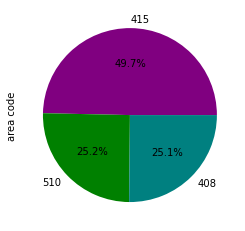

In [108]:
df['area code'].value_counts().plot.pie( colors=['purple', 'green', 'teal'],autopct ='%.1f%%');

In [109]:
print(not_retained_customers["area code_408"].sum())
print(not_retained_customers["area code_415"].sum())
print(not_retained_customers["area code_510"].sum())

122
236
125


In [110]:
print(retained_customers["area code_408"].sum()/retained_customers["area code_408"].count() )
print(retained_customers["area code_415"].sum()/retained_customers["area code_415"].count() )
print(retained_customers["area code_510"].sum()/retained_customers["area code_510"].count() )



0.2512280701754386
0.4978947368421053
0.25087719298245614


In [111]:
not_retained_customers["area code_408"].sum() 

122

In [112]:
print(not_retained_customers["area code_408"].value_counts())
print(not_retained_customers["area code_510"].value_counts())
print(not_retained_customers["area code_415"].value_counts())
# only half are being retained in area code 415 whereas approximately 75% are being retained in the other ones.


0    361
1    122
Name: area code_408, dtype: int64
0    358
1    125
Name: area code_510, dtype: int64
0    247
1    236
Name: area code_415, dtype: int64


**There is no difference in area code retention rates**.

In [120]:
print(not_retained_customers['account length'].mean(), ' months for churned customers')
print(retained_customers['account length'].mean(), ' months for retained customers')

102.66459627329192  months for churned customers
100.79368421052632  months for retained customers


In [153]:
print(not_retained_customers["number vmail messages"].mean(), 'for churned customers')
print(retained_customers["number vmail messages"].mean(), 'for retained customers')
# customers who are not retained have less voicemails.

5.115942028985507 for churned customers
8.604561403508772 for retained customers


## Conclusion

I have created a model that will help SyriaTel retain churned  customers. The model, an XGBoost model with optimized parameters, has a 94% precision and a 73% recall at predicting churned customers. I have recommended 3 solutions to reduce customer churn:

1. Proactively reach out to customers who make 2 calls or more to customer service.
2. Make a concerted effort to satisfy the concerns of customers who only have domestic plans since they represent the vast majority of churning customers. Customer Service calls are a perfect opportunity to find out what their concerns are and take steps to address them.
3. Reward customers who use over 634 monthly minutes or more. This will target 50% of churned customers and about 20% of retained customers.

These recommendations should make a dent in SyriaTel's churn rate. However, it would be presumptuous to assume that they  alone would comprehensively solve SyriaTel's comparatively model churn problem.

## Next Steps

1. Getting background information on users to better predict which users will churn. Demographic data like income level and age would be useful.
2. Examining the effect of bundled services like cable and internet. Churn rates for internet companies are 19% compared to  industry average of 22% for telecom companies. If customer information was available for cable and internet companies it would provide useful information over whether SyriaTel should consider branching into those areas
